# King County's House Price Dataset


<html>

<p>The Fisrt step before performing any model on our dataset, is getting more familiar with it. The purposed dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. There are 21 columns in the raw dataset but not all of them are data features.
</p>
    

<p>The features for our data are:</p>

<ls>
    <li>Selling date</li>
<li>Selling price</li>
<li>Number of bedrooms</li>
<li>Number of bathrooms</li>
<li>Area of living</li>
<li>Area of lot</li>
<li>Number of floors</li>
<li>Having waterfront</li>
<li>view</li>
<li>condition</li>
<li>grade</li>
<li>Area of above</li>
<li>Area of basement</li>
<li>year built</li>
<li>year renovated</li>
<li>zipcode</li>
<li>latitude</li>
<li>longitude</li>
<li>Area of living15</li>
<li>Area of lot15</li>
    </ls>
    
<p>We use pandas library to load the dataset, which is located in the root directory of the current notebook. Loading 
    numpy library for data manipulation, and seaborn library for data visualization would also take place at this stage</p>
</html>



In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date

path = './archive/'

kc_data = pd.read_csv(path + '/kc_house_data.csv')
kc_data.head() # we usually use head method to see the first 5 rows of the dataset to make sure everything is fine

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Finding Null and NaN cells

<html>
    <p>Finding Null cells and None-Number cells is an essential step for data preprocessing. In this stage we use two 
    methods to find the Null and NaN percentage for each column. We would also set an treshold to remove a whole
    column, if there were too missing values. Otherwise, the missing values would be replaced by the mean of that column.
    (Since our data consist numerical values we used mean. for categorical columns we can use mod instead of mean.</p>
    
    
</html>

In [88]:
# printing missing value's percentage for each data column

print('Percentage of NaN cells:')
print(kc_data.isna().sum()/len(kc_data)*100)
print('---')
print('Percentage of Null cells:')
print(kc_data.isnull().sum()/len(kc_data)*100)

# Droping columns that contain too missing values. If there were few missing values, they would be replaced by
# mean value of that column.

kc_data.dropna(thresh = 0.8 * len(kc_data), axis=1, inplace=True)
numeric               = kc_data.select_dtypes(include=np.number)
numeric_columns       = numeric.columns
kc_data[numeric_columns] = kc_data[numeric_columns].fillna(kc_data.mean())

print('---')
print('Data is cleaned')
kc_data

Percentage of NaN cells:
id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64
---
Percentage of Null cells:
id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64
---
Data is cleaned


C:\Users\esmae\AppData\Local\Temp/ipykernel_12712/2346758947.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kc_data[numeric_columns] = kc_data[numeric_columns].fillna(kc_data.mean())


id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

# Date Column Transformation

<html>
    
<p>Since the Date column is not in a proper type and also has a 'Object' type, we should transform this layer to a type that we can use in our future models. There are several ways to transform a date column, for example transform it to a categorical type or continues form. In this project we would use a continues form. Note that the date format is 'yyyymmddhhmmss' which doesn't have any hhmmss. </p>
    
</html>

In [89]:
# Transforming object type to integer

kc_data['date'] = kc_data['date'].map(lambda x: int(x[:8]))

# finding the minimum value in data column to make it as the base date for others.

base_date = min(kc_data['date'])

# This function turns integer dates to datetime format and calculate difference between entry date
# and minimum date, also known as base_date

def date_func(c_date):
    base = base_date
    y_date = c_date //10000
    m_date = c_date % 10000 // 100
    d_date = c_date % 100 
    
    c_date = date(y_date,m_date,d_date)
    
    y_base = base //10000
    m_base = base % 10000 // 100
    d_base = base % 100    
    
    base = date(y_base,m_base,d_base)
    
    return (c_date - base).days

# applying date_func to all rows in the dataframe

kc_data['date'] = kc_data['date'].map(lambda x:date_func(x))

kc_data

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520   164  221900.0         3       1.00         1180      5650   
1      6414100192   221  538000.0         3       2.25         2570      7242   
2      5631500400   299  180000.0         2       1.00          770     10000   
3      2487200875   221  604000.0         4       3.00         1960      5000   
4      1954400510   292  510000.0         3       2.00         1680      8080   
...           ...   ...       ...       ...        ...          ...       ...   
21608   263000018    19  360000.0         3       2.50         1530      1131   
21609  6600060120   297  400000.0         4       2.50         2310      5813   
21610  1523300141    52  402101.0         2       0.75         1020      1350   
21611   291310100   259  400000.0         3       2.50         1600      2388   
21612  1523300157   166  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0         1.0           0     0  ...      7        1180              0   
1         2.0           0     0  ...      7        2170            400   
2         1.0           0     0  ...      6         770              0   
3         1.0           0     0  ...      7        1050            910   
4         1.0           0     0  ...      8        1680              0   
...       ...         ...   ...  ...    ...         ...            ...   
21608     3.0           0     0  ...      8        1530              0   
21609     2.0           0     0  ...      8        2310              0   
21610     2.0           0     0  ...      7        1020              0   
21611     2.0           0     0  ...      8        1600              0   
21612     2.0           0     0  ...      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 21 columns]

# Finding and Removing Outliers

<html>
    
<p>One easy way is computing z-score for each cell and then remove high z-score values, based on a certain treshold.
    z-score can be computed as below:</p>
    
</html>

$ \begin{align} 
\large Z-Score =  \frac {x - \mu}{\sigma}
\end{align} $

<html>
    
<p>Using z-score is highly depends on the column that we are using. For example, for the column 'yr_renovate", which is
    explaining wether a house has been renovated or not, z-score is not usefull in the first step, and more transformations
    have to be considered before using it. also, the treshold for various columns, could be different, and this can be measured
    by that columns data distribuation. So, we need to visualize each colums first to have a better understanding of each
    column, and then decide the value of z treshold.</p>
    
</html>

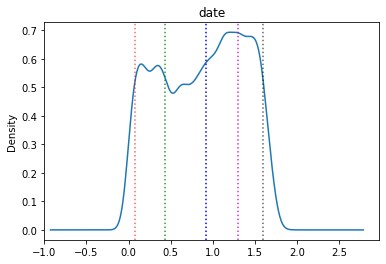

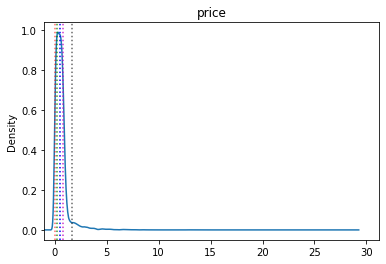

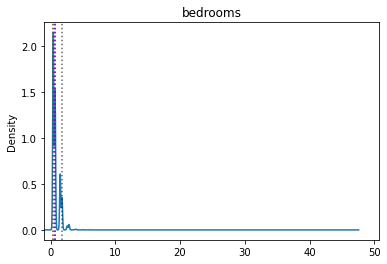

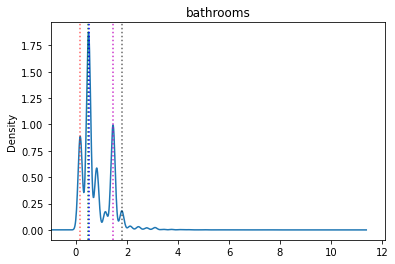

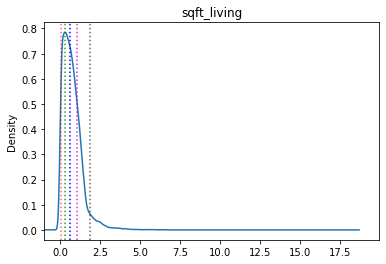

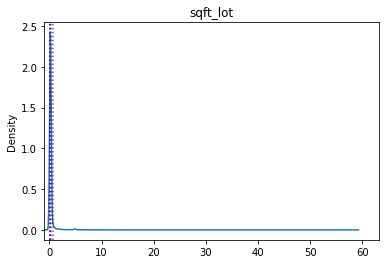

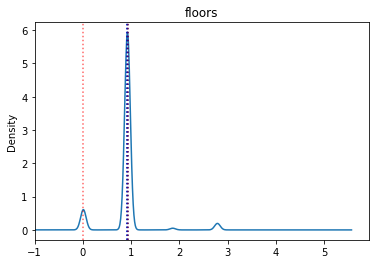

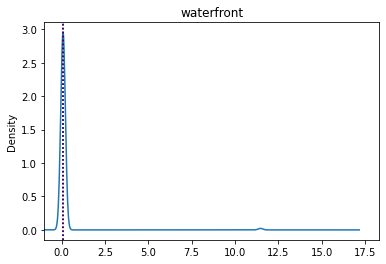

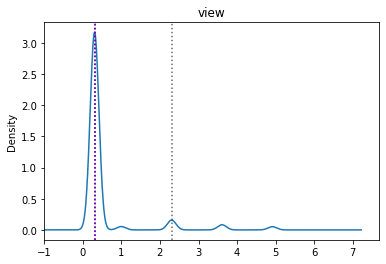

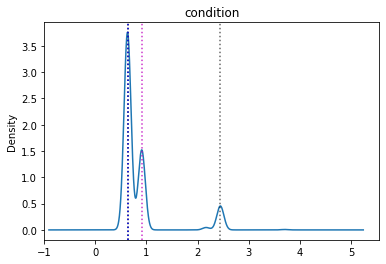

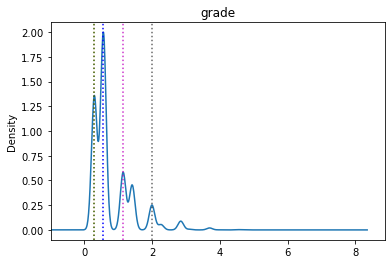

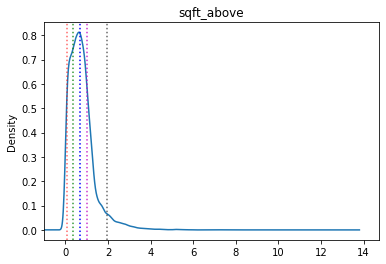

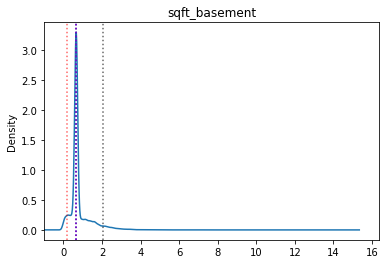

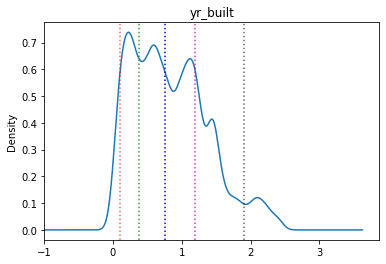

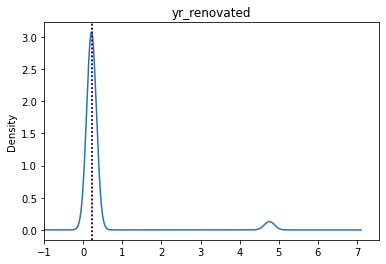

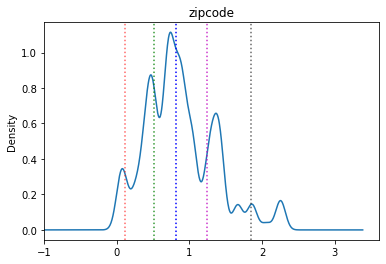

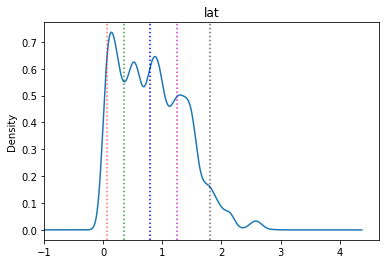

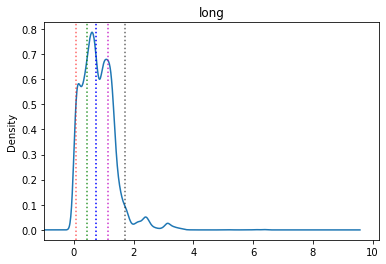

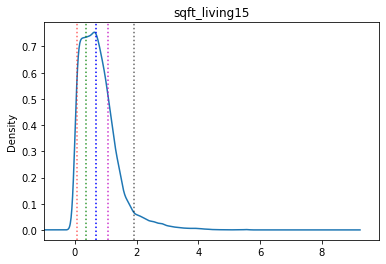

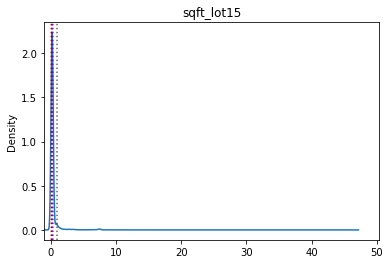

In [90]:
# Droping 'id' and 'date' column since the first one is note a feature and the second one is not a numerical feature

data = kc_data.drop(['id',],axis = 1)

# Calculating z-score value
z_score = np.abs(stats.zscore(data))

# Plotting KDE plot for each feature, with five different quantile valuse to give a better understnding of data distribution

for feature in z_score.columns:
    fig, ax = plt.subplots()
    z_score[feature].plot(kind = 'kde')
    ax.set_title(feature)
    
    quant_5, quant_25, quant_50, quant_75, quant_95 = z_score[feature].quantile(0.05), z_score[feature].quantile(0.25), z_score[feature].quantile(0.5), z_score[feature].quantile(0.75), z_score[feature].quantile(0.95)
    quants = [[quant_5, 0.6, 'r'], [quant_25, 0.8, 'g'], [quant_50, 1, 'b'],  [quant_75, 0.8, 'm'], [quant_95, 0.6,'k']]
    for i in quants:
        ax.axvline(i[0],alpha = i[1], linestyle = ":",color = i[2])
    ax.set_xlim(xmin = -1)


<html>
    
<p>As it can be seen from the visualization, there are outliers in some columns:</p>
<ls>
    <li>price</li>
    <li>bedrooms</li>
    <li>bathrooms</li>
    <li>sqft_living</li>
    <li>sqft_lot</li>
    <li>sqft_above</li>
    <li>sqft_basement</li>
</ls>

<p>One way to remove outliers from the data is to set a treshold for all feature's z-score. we should notice that some features like yr_renovated and sqft_basement need some tranformations to find real ouliers instead of correct data.</p>    

<p>So, first of all we would add two columns of is_renovated and has_basement to data to split houses that have been renovated or have basement from the other cells, and after that transfer the year, and area value with following formula to decrease the biased z-score for these colums. After that we would use z-score tresholds to remove outliers from each feature</p>
    

</html>

$ \begin{align} 
\large New Value =  \frac {1}{Previous Value}
\end{align} $

<html>
    
<p>We should note that the mentioned formula would be used for non-zero values.</p>

</html>

In [91]:
# Adding two columns for renovation and having a basement.

data['is_renovated']  = np.where(data['yr_renovated'] != 0, 1, 0)

data['has_basement']  = np.where(data['sqft_basement'] != 0, 1 , 0)

# Transforming yr_renovated and sqft_basement to decrease biased z-score value.

data['yr_renovated']  = np.where(data['yr_renovated'] != 0, 1/ (2021 - data['yr_renovated']) , 0)

data['sqft_basement'] = np.where(data['sqft_basement'] != 0, 1/data['sqft_basement'], 0)

<html>
    
<p>Now we can compute z-score for yr_renovated, and sqft_basement. The following graphs illustrate data distribution for these columns:</p>
    

</html>

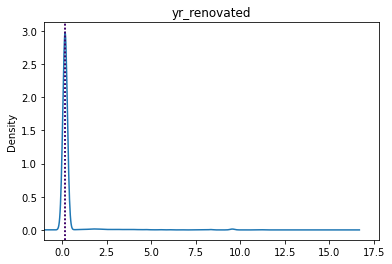

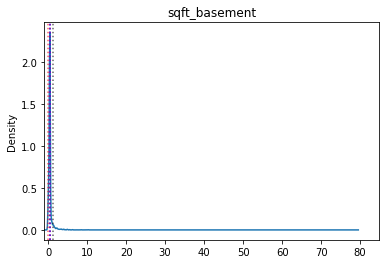

In [92]:
# Calculating z-score value
new_z_score = np.abs(stats.zscore(data))

# Plotting KDE plot for each feature, with five different quantile valuse to give a better understnding of data distribution

for feature in ['yr_renovated','sqft_basement',]:
    fig, ax = plt.subplots()
    new_z_score[feature].plot(kind = 'kde')
    ax.set_title(feature)
    
    quant_5, quant_25, quant_50, quant_75, quant_95 = new_z_score[feature].quantile(0.05),new_z_score[feature].quantile(0.25), new_z_score[feature].quantile(0.5), new_z_score[feature].quantile(0.75),new_z_score[feature].quantile(0.95)
    quants = [[quant_5, 0.6, 'r'], [quant_25, 0.8, 'g'], [quant_50, 1, 'b'],  [quant_75, 0.8, 'm'], [quant_95, 0.6,'k']]
    for i in quants:
        ax.axvline(i[0],alpha = i[1], linestyle = ":",color = i[2])
    ax.set_xlim(xmin = -1)


<html>
    
<p>Now that the data is transformed, we can use z-score value to remove outliers from dataframe. treshold of 5 seems a reasonable value for removing outliers, according to KDE graphs that we saw previously</p>
    

</html>

In [93]:
preprocessed = data[(new_z_score < 5).all(axis=1)]

preprocessed

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       164  221900.0         3       1.00         1180      5650     1.0   
1       221  538000.0         3       2.25         2570      7242     2.0   
2       299  180000.0         2       1.00          770     10000     1.0   
3       221  604000.0         4       3.00         1960      5000     1.0   
4       292  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21608    19  360000.0         3       2.50         1530      1131     3.0   
21609   297  400000.0         4       2.50         2310      5813     2.0   
21610    52  402101.0         2       0.75         1020      1350     2.0   
21611   259  400000.0         3       2.50         1600      2388     2.0   
21612   166  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  ...  sqft_basement  yr_built  \
0               0     0          3  ...       0.000000      1955   
1               0     0          3  ...       0.002500      1951   
2               0     0          3  ...       0.000000      1933   
3               0     0          5  ...       0.001099      1965   
4               0     0          3  ...       0.000000      1987   
...           ...   ...        ...  ...            ...       ...   
21608           0     0          3  ...       0.000000      2009   
21609           0     0          3  ...       0.000000      2014   
21610           0     0          3  ...       0.000000      2009   
21611           0     0          3  ...       0.000000      2004   
21612           0     0          3  ...       0.000000      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          0.000000    98178  47.5112 -122.257           1340        5650   
1          0.033333    98125  47.7210 -122.319           1690        7639   
2          0.000000    98028  47.7379 -122.233           2720        8062   
3          0.000000    98136  47.5208 -122.393           1360        5000   
4          0.000000    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608      0.000000    98103  47.6993 -122.346           1530        1509   
21609      0.000000    98146  47.5107 -122.362           1830        7200   
21610      0.000000    98144  47.5944 -122.299           1020        2007   
21611      0.000000    98027  47.5345 -122.069           1410        1287   
21612      0.000000    98144  47.5941 -122.299           1020        1357   

       is_renovated  has_basement  
0                 0             0  
1                 1             1  
2                 0             0  
3                 0             1  
4                 0             0  
...             ...           ...  
21608             0             0  
21609             0             0  
21610             0             0  
21611             0             0  
21612             0             0  

[20718 rows x 22 columns]

<html>
    
<p>895 cells that were not in a reasonable range of others have been removed from the table.</p>
    

</html>

# Finding Co-related columns

<html>
    
<p>In this step we will remove features that are highly co-related to each other, since keeping both of them in the dataset would affect the accuracy of our models to predict price of a house based on its features. First, we would visualize pair graphs among data features, and after that using a correlation matrix, we would correct data features.</p>
    

</html>

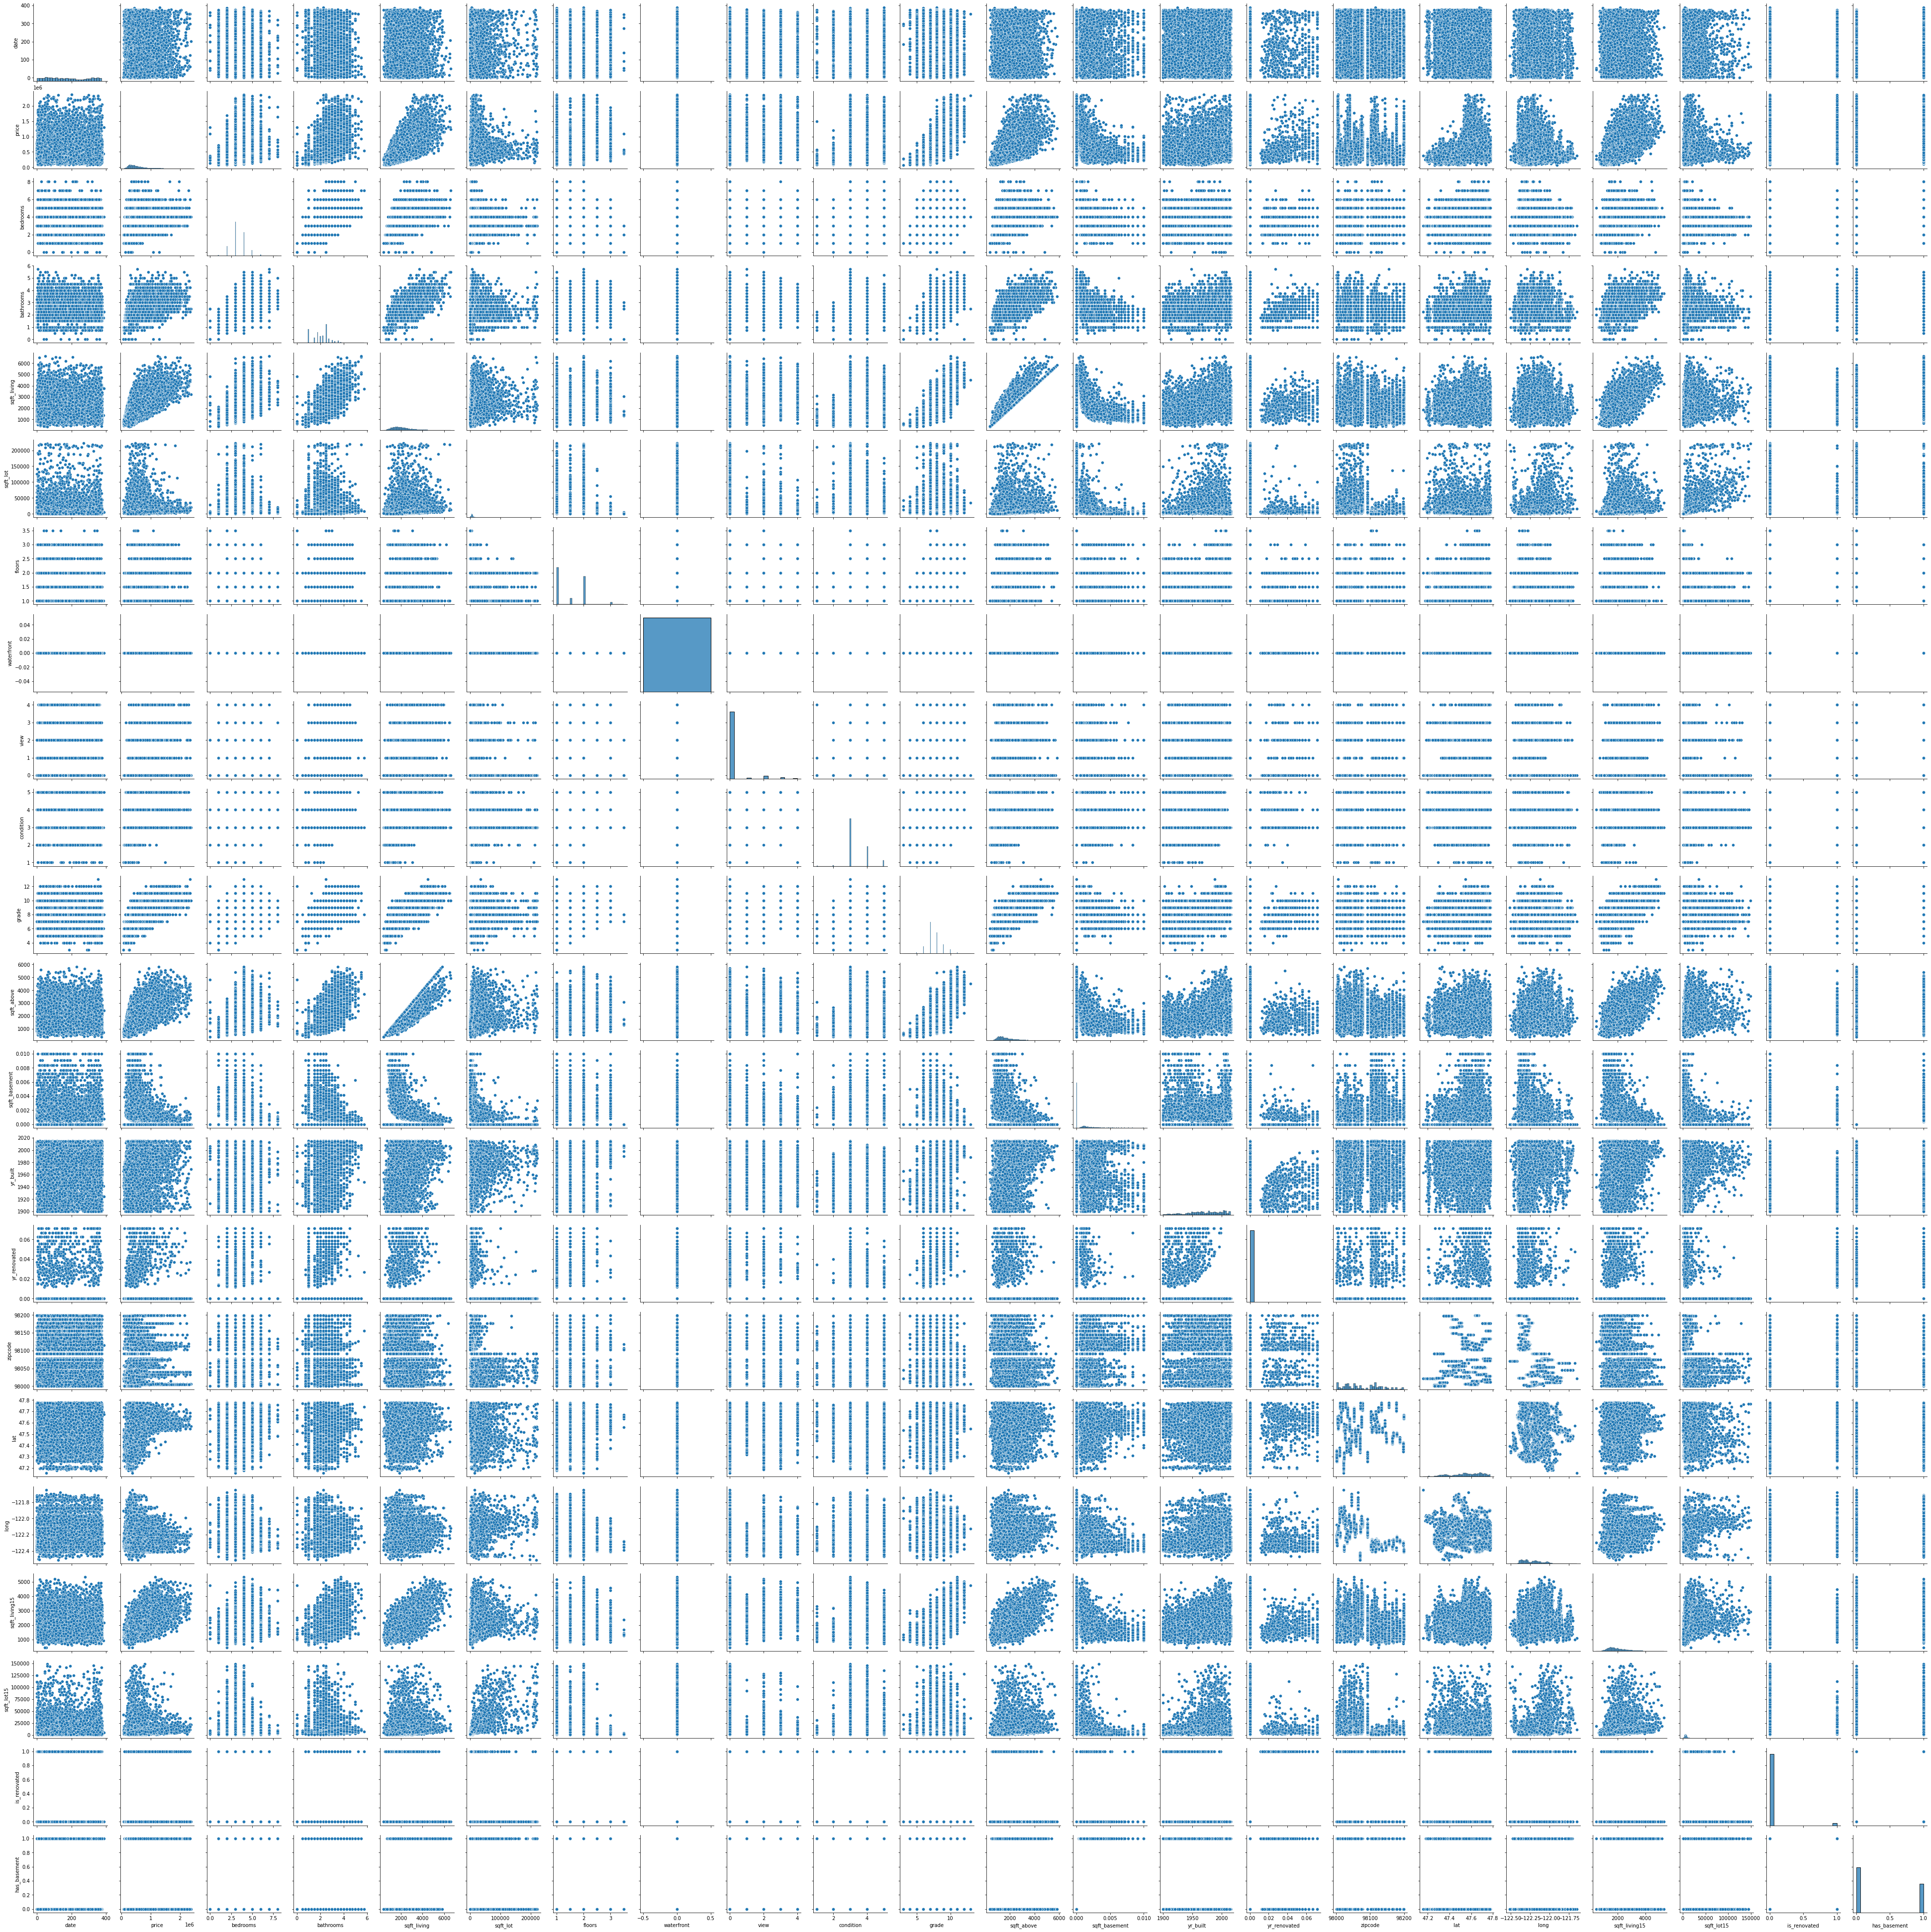

In [94]:
sns.pairplot(preprocessed)

<html>
    
<p>We can also plot each feature in comparison to price, since price is the target for this dataset</p>
    

</html>

C:\Users\esmae\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


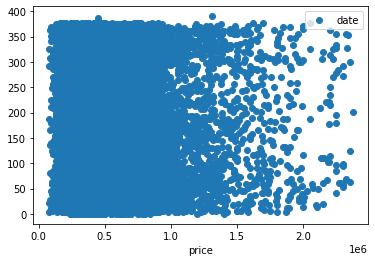

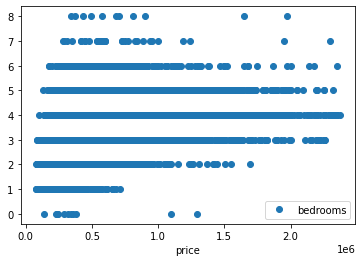

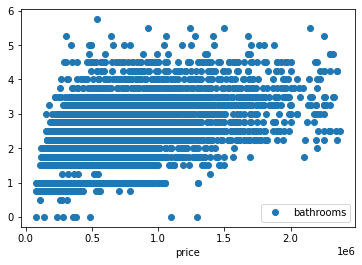

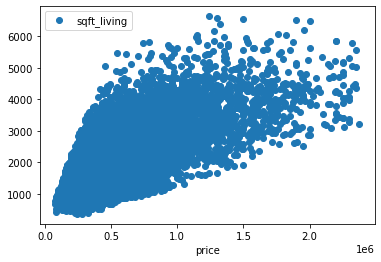

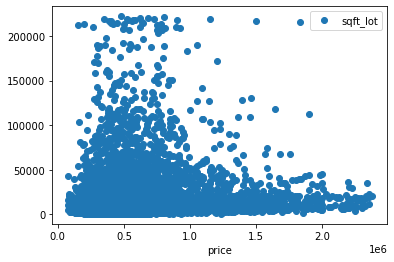

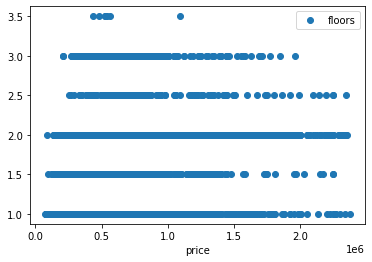

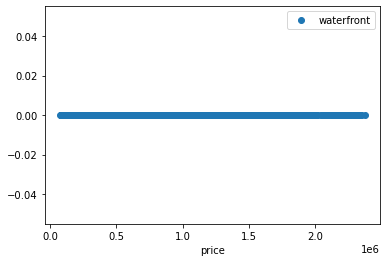

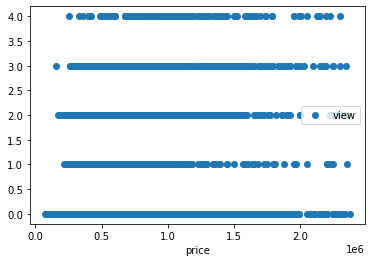

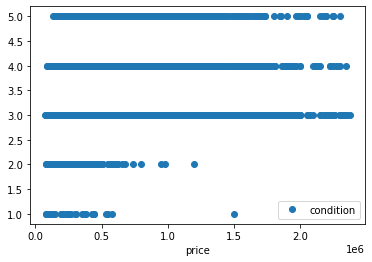

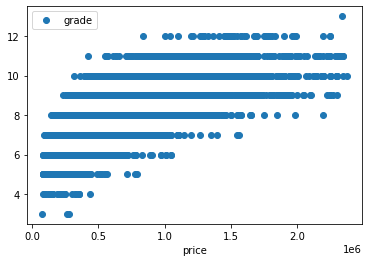

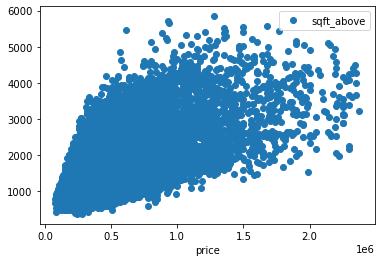

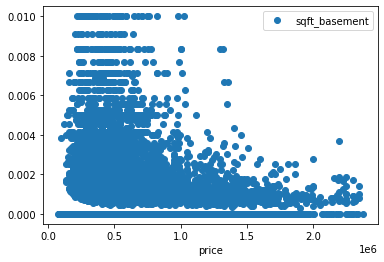

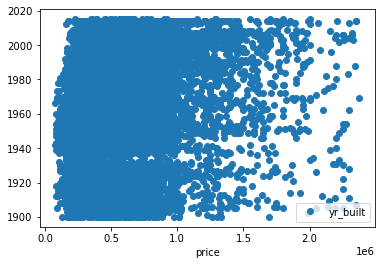

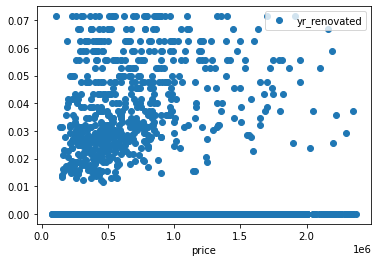

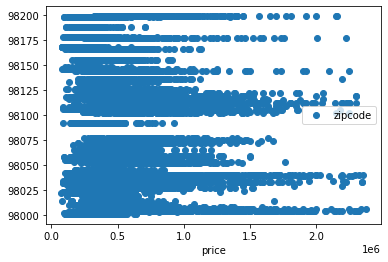

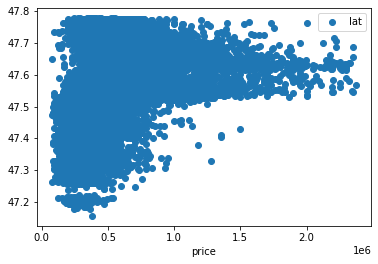

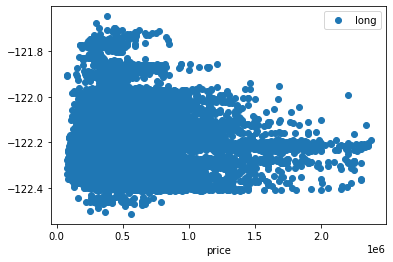

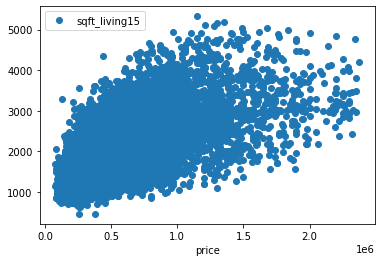

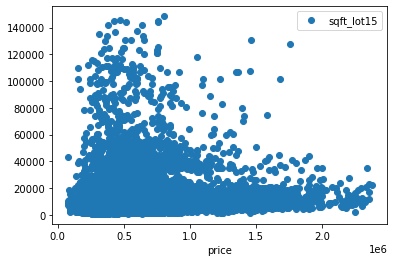

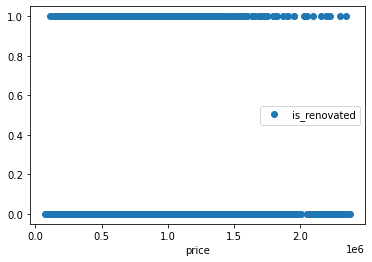

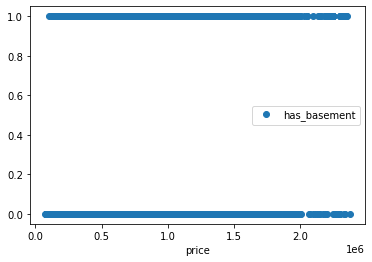

In [108]:
columns = list(preprocessed.columns)
columns.remove('price')


for feature in columns:
    preprocessed.plot(x='price', y=feature , style='o')
    

<AxesSubplot:>

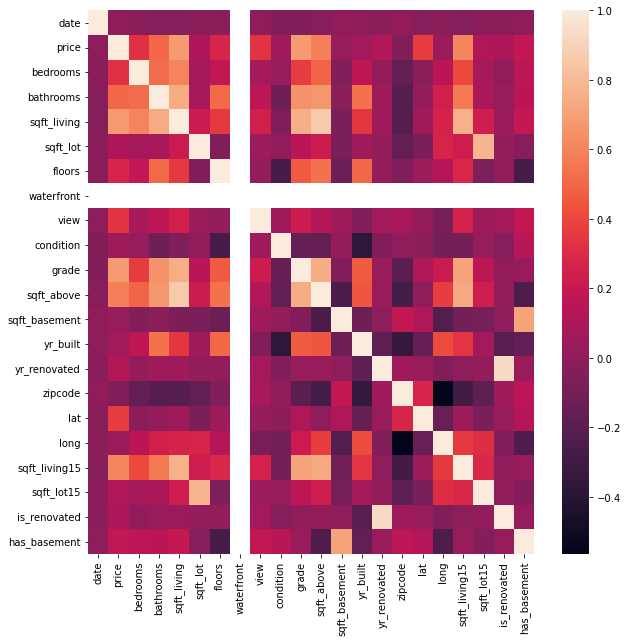

In [109]:
# Creating pearson correlation matrix and ploting it
cor_mat = preprocessed.corr(method= 'pearson')
fig = plt.figure(figsize=(10,10))
sns.heatmap(cor_mat)

<html>
    
<p>As it can be seen, 'waterfront' feature has a constant value of 1 after data cleaning and can be removed from the dataset. Also, [sqft_living15 and sqft_living] and [sqft_lot15 and sqft_lot] have high correlation, so it would be eniugh to have one from each pair in our dataset.</p>
    

</html>

In [110]:
final_v_dataset = preprocessed.drop(['waterfront','sqft_lot15','sqft_living15'], axis = 1)

<html>
    
<p>Finally we can save our result, which is ready to be used by our models.</p>
   

</html>

In [111]:
final_v_dataset.to_csv(path + 'kc_preprocessed.csv')

final_v_dataset

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       164  221900.0         3       1.00         1180      5650     1.0   
1       221  538000.0         3       2.25         2570      7242     2.0   
2       299  180000.0         2       1.00          770     10000     1.0   
3       221  604000.0         4       3.00         1960      5000     1.0   
4       292  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21608    19  360000.0         3       2.50         1530      1131     3.0   
21609   297  400000.0         4       2.50         2310      5813     2.0   
21610    52  402101.0         2       0.75         1020      1350     2.0   
21611   259  400000.0         3       2.50         1600      2388     2.0   
21612   166  325000.0         2       0.75         1020      1076     2.0   

       view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0          3      7        1180       0.000000      1955   
1         0          3      7        2170       0.002500      1951   
2         0          3      6         770       0.000000      1933   
3         0          5      7        1050       0.001099      1965   
4         0          3      8        1680       0.000000      1987   
...     ...        ...    ...         ...            ...       ...   
21608     0          3      8        1530       0.000000      2009   
21609     0          3      8        2310       0.000000      2014   
21610     0          3      7        1020       0.000000      2009   
21611     0          3      8        1600       0.000000      2004   
21612     0          3      7        1020       0.000000      2008   

       yr_renovated  zipcode      lat     long  is_renovated  has_basement  
0          0.000000    98178  47.5112 -122.257             0             0  
1          0.033333    98125  47.7210 -122.319             1             1  
2          0.000000    98028  47.7379 -122.233             0             0  
3          0.000000    98136  47.5208 -122.393             0             1  
4          0.000000    98074  47.6168 -122.045             0             0  
...             ...      ...      ...      ...           ...           ...  
21608      0.000000    98103  47.6993 -122.346             0             0  
21609      0.000000    98146  47.5107 -122.362             0             0  
21610      0.000000    98144  47.5944 -122.299             0             0  
21611      0.000000    98027  47.5345 -122.069             0             0  
21612      0.000000    98144  47.5941 -122.299             0             0  

[20718 rows x 19 columns]